In [5]:
import numpy as np
import subprocess
import os
import glob
import shutil
import argparse
import yaml
import xarray as xr
import matplotlib.pyplot as plt
from functions import preproc_nemo_T
from functions import moving_average
from functions import interp_average

In [6]:
expname='beta'
dirs = {
    'exp': os.path.join("/ec/res4/scratch/itas/ece4", expname),
    'nemo': os.path.join('/ec/res4/scratch/itas/ece4/', expname, 'output', 'nemo'),
    'rebuild': "/ec/res4/hpcperm/itas/src/rebuild_nemo"
}

In [12]:
startyear = 1990
endyear =2100
domain = xr.open_dataset(os.path.join(dirs['exp'], 'domain_cfg.nc'))
vol = domain['e1t']*domain['e2t']*domain['e3t_0']
area = domain['e1t']*domain['e2t']
filelist = []
for year in range(startyear, endyear):
    pattern = os.path.join(dirs['nemo'], f"{expname}_oce_1m_T_{year}-{year}.nc")
    matching_files = glob.glob(pattern)
    filelist.extend(matching_files)
data = xr.open_mfdataset(filelist, preprocess=preproc_nemo_T)

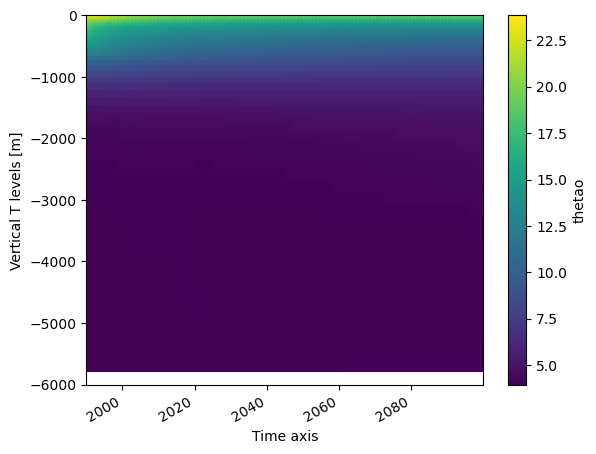

In [13]:
data.thetao.mean(dim=['y', 'x']).plot(y='z')